## 关于图像增强

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
def make_gen():
    trainAug = ImageDataGenerator(rescale= 1 / 255.,
                                 rotation_range=20,
                                 zoom_range=0.05,
                                 width_shift_range=0.05,
                                 height_shift_range=0.05,
                                 shear_range=0.05,
                                 horizontal_flip=True,
                                 fill_mode="nearest")
    trainGen = trainAug.flow_from_directory("./mnist_train/", target_size=(28, 28), class_mode="categorical", color_mode="grayscale", batch_size=100)
    return trainGen

In [17]:
train_ds = tf.data.Dataset.from_generator(make_gen, (tf.float32, tf.int32))

In [18]:
print(train_ds.output_types)
print(train_ds.output_shapes)

(tf.float32, tf.int32)
(TensorShape(None), TensorShape(None))


In [19]:
iterator = train_ds.make_one_shot_iterator()
next_element = iterator.get_next()

In [21]:
import matplotlib.pyplot as plt

Found 60000 images belonging to 10 classes.
(28, 28, 1)
[0 0 0 0 0 1 0 0 0 0]


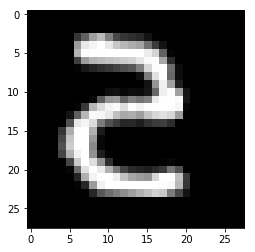

In [28]:
with tf.Session() as sess:
    for i in range(1):
        img, label = sess.run(next_element)
        img1 = img[90]
        label1 = label[90]
        print(img1.shape)
        print(label1)
        plt.imshow(img1.squeeze(), cmap="gray")
        plt.show()